In [1]:
import rasterio
import rasterio.plot
#import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
#import pprint
from dateutil import parser
import warnings
warnings.filterwarnings('ignore')

# load the mask
with rasterio.open("/Users/nicoleta/Desktop/data/ASO_30m_processed/scene_30m_mask.tif") as raster:
    mask = raster.read(1)

In [2]:
import os

data_files = []
for root, dirs, files in os.walk("/Users/nicoleta/Desktop/data/ASO_30m_processed/", topdown=False):
    for name in files:
        if 'SUPERsnow' in name:
            #print(os.path.join(root, name))
            data_files.append(name)
data_files

['TE20160326_SUPERsnow_depth.tif_mean30m.tif',
 'TB20150403_SUPERsnow_depth.tif_mean30m.tif',
 'TB20140428_SUPERsnow_depth.tif_mean30m.tif',
 'TB20150427_SUPERsnow_depth.tif_mean30m.tif',
 'TB20140502_SUPERsnow_depth.tif_mean30m.tif',
 'TB20160708_09_SUPERsnow_depth_wtrMsked.tif_mean30m.tif',
 'TB20160613_14_SUPERsnow_depth.tif_mean30m.tif',
 'TB20150325_SUPERsnow_depth.tif_mean30m.tif',
 'TB20140531_SUPERsnow_depth.tif_mean30m.tif',
 'TB20140413_SUPERsnow_depth.tif_mean30m.tif',
 'TB20160701_SUPERsnow_depth_wtrMsked.tif_mean30m.tif',
 'TB20140420_SUPERsnow_depth.tif_mean30m.tif',
 'TB20140407_SUPERsnow_depth.tif_mean30m.tif',
 'TE20170303_SUPERsnow_depth.tif_mean30m.tif',
 'TB20150305_06_SUPERsnow_depth.tif_mean30m.tif',
 'TB20150608_SUPERsnow_depth.tif_mean30m.tif',
 'TB20150409_SUPERsnow_depth.tif_mean30m.tif',
 'TB20150217_18_SUPERsnow_depth.tif_mean30m.tif',
 'TB20160620_SUPERsnow_depth.tif_mean30m.tif',
 'TE20160509_SUPERsnow_depth.tif_mean30m.tif',
 'TB20160625_SUPERsnow_depth.t

In [3]:
import re
data = {
    '2014': [],
    '2015': [],
    '2016': []
}

dates = { '2014': [], '2015': [], '2016': [] }

for file in data_files:
    match = re.match("\w{2}(\d{4})(\d{4}).*", file)
    if match:
        if match.group(1) in data.keys():
            with rasterio.open(f'/Users/nicoleta/Desktop/data/ASO_30m_processed/{file}') as raster:
                data[match.group(1)].append(raster.read(1)*mask)
                dates[match.group(1)].append(parser.parse(match.group(1) + match.group(2)))

In [4]:
data

{'2014': [array([[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]),
  array([[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]),
  array([[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]),
  array([[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan,

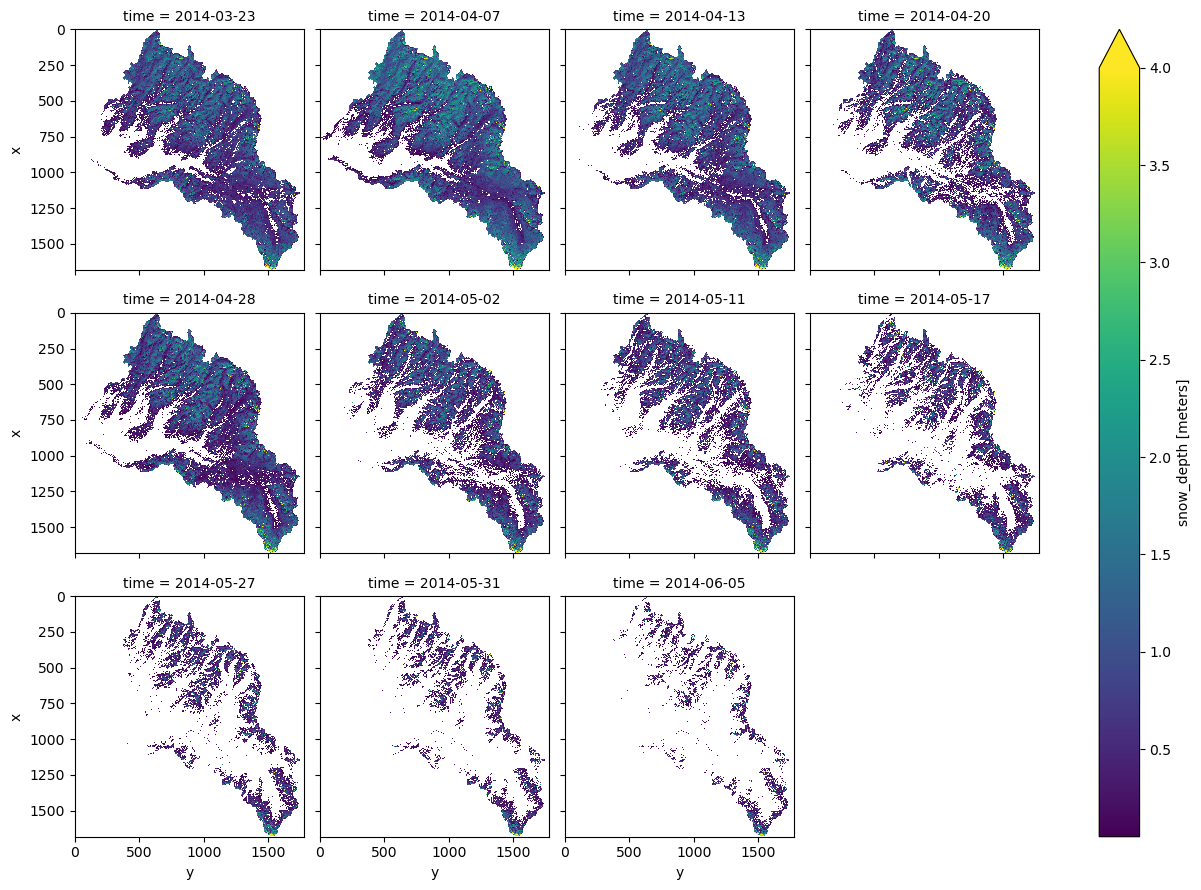

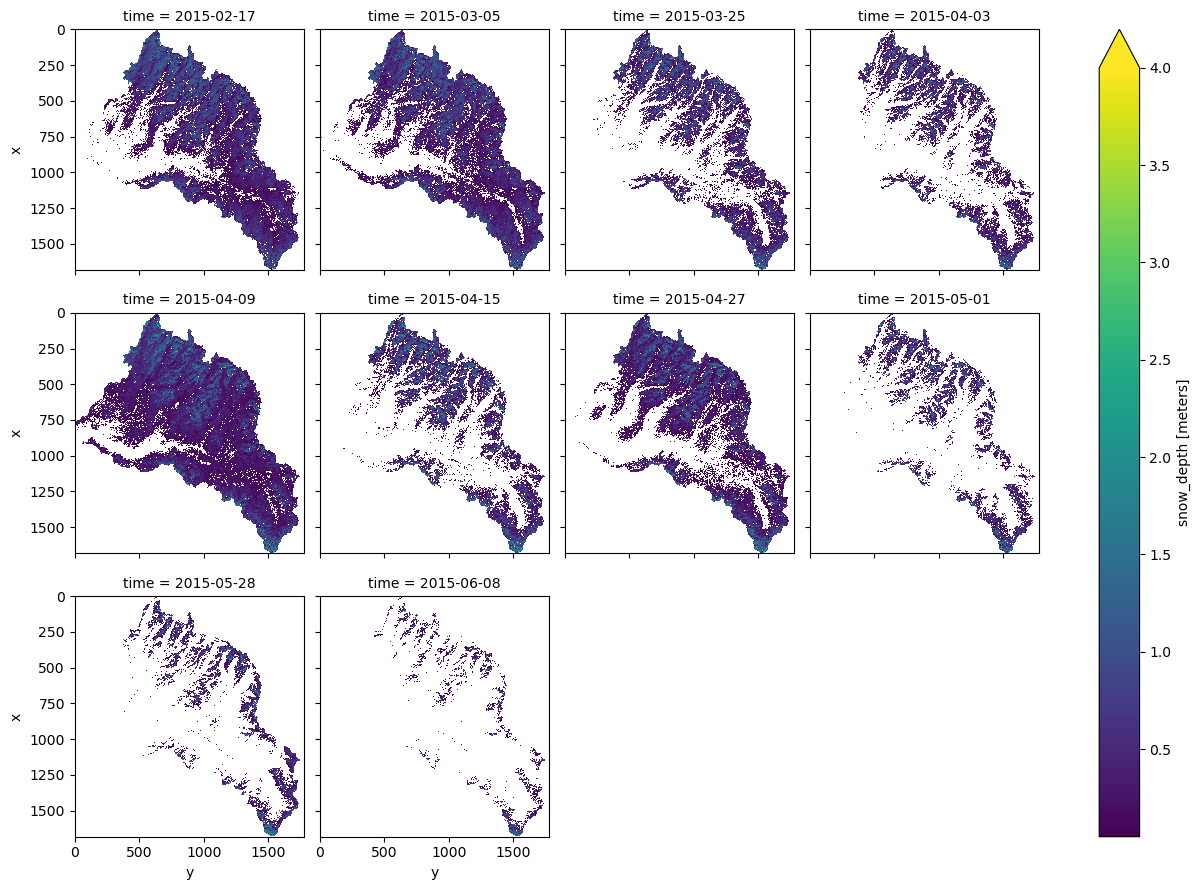

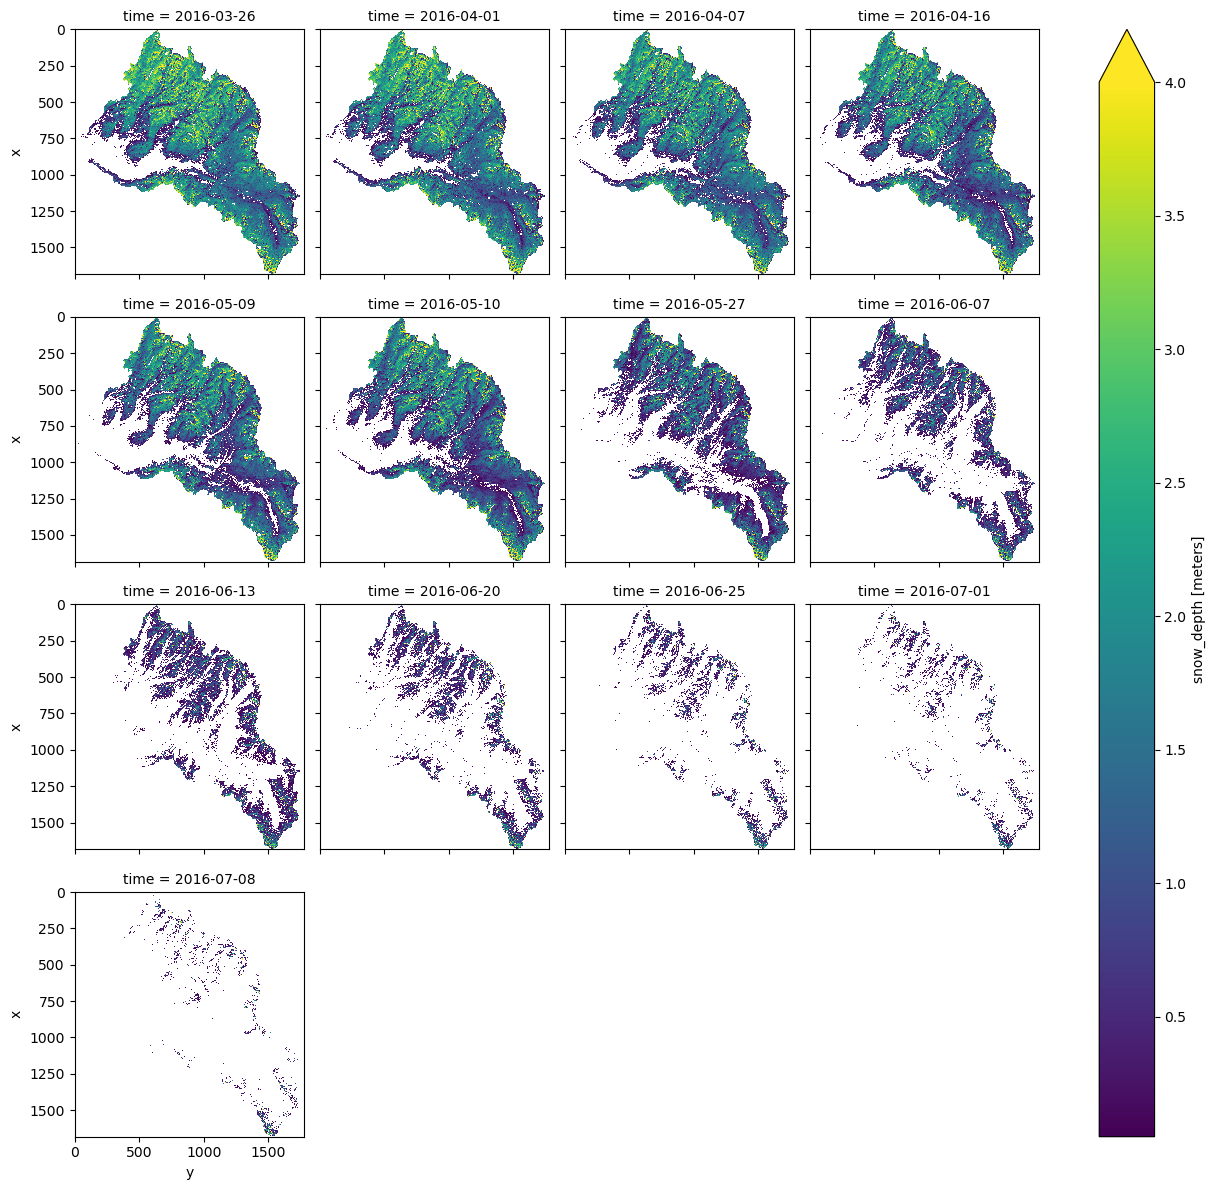

In [5]:
for year,values in data.items():
    data_matrices = np.asarray(values)
    data_array = xr.DataArray(data_matrices,
                              dims=('time','x', 'y'),
                              coords={'x': range(1684), 'y': range(1777),'time': dates[year]},
                              attrs={'units': 'meters'},
                              name='snow_depth')
    data_array.sortby('time').plot(col='time', col_wrap=4, vmax=4)
    plt.gca().invert_yaxis()